# Análisis Exploratorio de Datos (EDA):

## Objetivo
Este notebook contiene el análisis exploratorio completo del dataset, siguiendo una estructura organizada y metódica para entender los datos, limpiarlos y prepararlos para modelado.

## Contenido
1. Configuración Inicial y librearías
2. Limpieza
    - Carga de datos sucios
3. Análisis Exploratorio de los Datos
    - Carga de datos limpios
4. Análisis estadístico
5. Análisis Univariante
6. Análisis Bivariante

# 1. Configuración Inicial

Importamos las bibliotecas necesarias y configuramos el entorno de trabajo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import os
import re


### Configuración del estilo visual

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows
# pd.set_option('display.max_colwidth', None) # Show entire content of each column
pd.set_option('display.width', None)        # No limit on display width
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping

In [ ]:
df_clean_data = pd.read_csv("df_final.csv")
df_clean_data.head(20)

entity  year  schizophrenia_disorders  depressive_disorders  anxiety_disorders  bipolar_disorders  eating_disorders  dalys_depressive_disorders  dalys_schizophrenia  dalys_bipolar_disorder  dalys_eating_disorders  dalys_anxiety_disorders
0   Afghanistan  1990                 0.223206              4.996118           4.713314           0.703023          0.127700                   895.22565            138.24825               147.64412               26.471115                440.33000
1   Afghanistan  1991                 0.222454              4.989290           4.702100           0.702069          0.123256                   893.88434            137.76122               147.56696               25.548681                439.47202
2   Afghanistan  1992                 0.221751              4.981346           4.683743           0.700792          0.118844                   892.34973            137.08030               147.13086               24.637949                437.60718
3   Afghanistan  1993                 0.220987              4.976958           4.673549           0.700087          0.115089                   891.51587            136.48602               146.78812               23.863169                436.69104
4   Afghanistan  1994                 0.220183              4.977782           4.670810           0.699898          0.111815                   891.39160            136.18323               146.58481               23.189074                436.76800
5   Afghanistan  1995                 0.219409              4.978228           4.668100           0.699768          0.108507                   891.21344            135.65398               146.63217               22.503244                436.69098
6   Afghanistan  1996                 0.218465              4.981489           4.665759           0.699650          0.105269                   891.92096            135.16324               146.67957               21.827526                436.52713
7   Afghanistan  1997                 0.217286              4.987593           4.665013           0.699597          0.101531                   893.02045            134.20360               146.54947               21.124723                436.42557
8   Afghanistan  1998                 0.216074              4.996858           4.668240           0.699765          0.098050                   894.73680            133.56137               146.69704               20.412657                436.77020
9   Afghanistan  1999                 0.215068              5.004257           4.673557           0.700054          0.095723                   896.13806            132.82457               146.76817               19.931143                437.12753
10  Afghanistan  2000                 0.214515              5.008448           4.676880           0.700252          0.094876                   897.06310            132.56447               146.69957               19.769741                437.81378
11  Afghanistan  2001                 0.214315              5.003872           4.675786           0.700129          0.094547                   896.19244            132.38344               146.80049               19.726470                437.81840
12  Afghanistan  2002                 0.214188              4.994327           4.672062           0.699779          0.094810                   894.41486            132.26962               147.02120               19.788143                437.49268
13  Afghanistan  2003                 0.214093              4.981722           4.671881           0.699606          0.094983                   892.85490            132.65482               146.89832               19.847649                437.71780
14  Afghanistan  2004                 0.214061              4.973161           4.672751           0.699501          0.095531                   891.61444            132.47002               147.10779               19.985369                438.05847
15  Afghanistan  2005                 0.214097           

In [ ]:
df_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7110 entries, 0 to 7109
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   entity                      7110 non-null   object 
 1   year                        7110 non-null   int64  
 2   schizophrenia_disorders     6420 non-null   float64
 3   depressive_disorders        6420 non-null   float64
 4   anxiety_disorders           6420 non-null   float64
 5   bipolar_disorders           6420 non-null   float64
 6   eating_disorders            6420 non-null   float64
 7   dalys_depressive_disorders  6840 non-null   float64
 8   dalys_schizophrenia         6840 non-null   float64
 9   dalys_bipolar_disorder      6840 non-null   float64
 10  dalys_eating_disorders      6840 non-null   float64
 11  dalys_anxiety_disorders     6840 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 666.7+ KB


In [ ]:
df_clean_data.describe()

year  schizophrenia_disorders  depressive_disorders  anxiety_disorders  bipolar_disorders  eating_disorders  dalys_depressive_disorders  dalys_schizophrenia  dalys_bipolar_disorder  dalys_eating_disorders  dalys_anxiety_disorders
count  7110.00000              6420.000000           6420.000000        6420.000000        6420.000000       6420.000000                 6840.000000          6840.000000             6840.000000             6840.000000              6840.000000
mean   2004.50000                 0.266604              3.767036           4.101840           0.636968          0.195664                  652.215475           171.090876              137.930619               42.392972               392.942475
std       8.65605                 0.039383              0.925286           1.050543           0.233391          0.138380                  183.643326            26.234514               51.197175               29.394380               100.820728
min    1990.00000                 0.188416              1.522333           1.879996           0.181667          0.044780                  243.097840           119.913380               39.438133                9.671199               180.049640
25%    1997.00000                 0.242267              3.080036           3.425846           0.520872          0.096416                  506.857413           155.950035              112.140244               20.837689               327.652407
50%    2004.50000                 0.273477              3.636772           3.939547           0.579331          0.144150                  640.099150           175.115100              124.228445               31.430651               376.317940
75%    2012.00000                 0.286575              4.366252           4.564164           0.844406          0.251167                  765.842910           183.999005              184.438120               55.850353               438.437842
max    2019.00000                 0.462045              7.645899           8.624634           1.506730          1.031688                 1427.423600           291.100100              325.152800              218.704390               814.302300

## Analisis exploratorio de datos

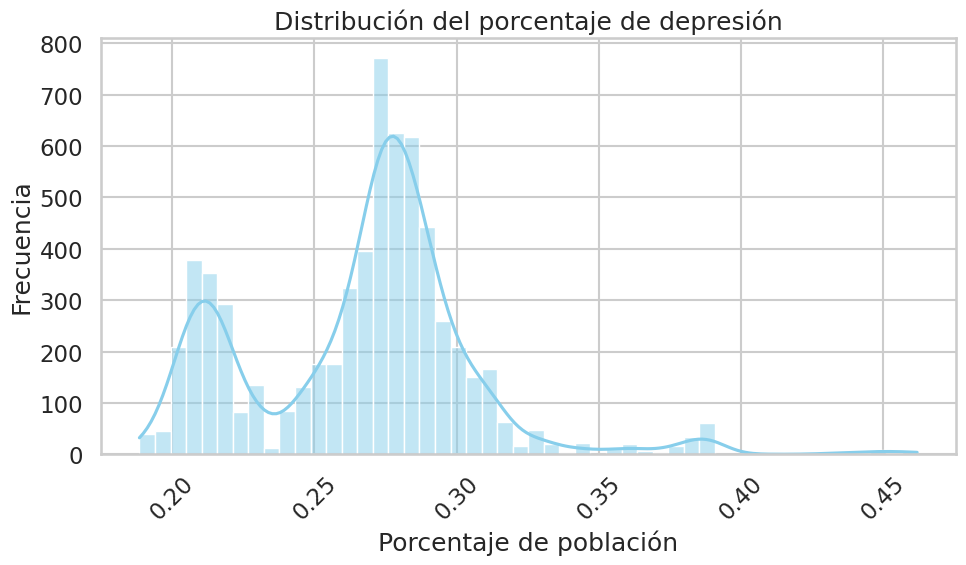

In [ ]:
df_data = pd.read_csv("df_final.csv")

# 2. Preprocesamiento: convierte la columna a numérica si es necesario
df_clean_data = df_data.copy()
col_name = 'schizophrenia_disorders'
df_clean_data[col_name] = pd.to_numeric(df_clean_data[col_name], errors='coerce')

# 3. Genera el gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df_clean_data[col_name], bins=50, kde=True, color='skyblue')
plt.title('Distribución del porcentaje de depresión')
plt.xlabel('Porcentaje de población')
plt.ylabel('Frecuencia')

# Solo si los valores son numéricos muy grandes o pequeños:
# plt.ticklabel_format(axis='x', style='plain')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


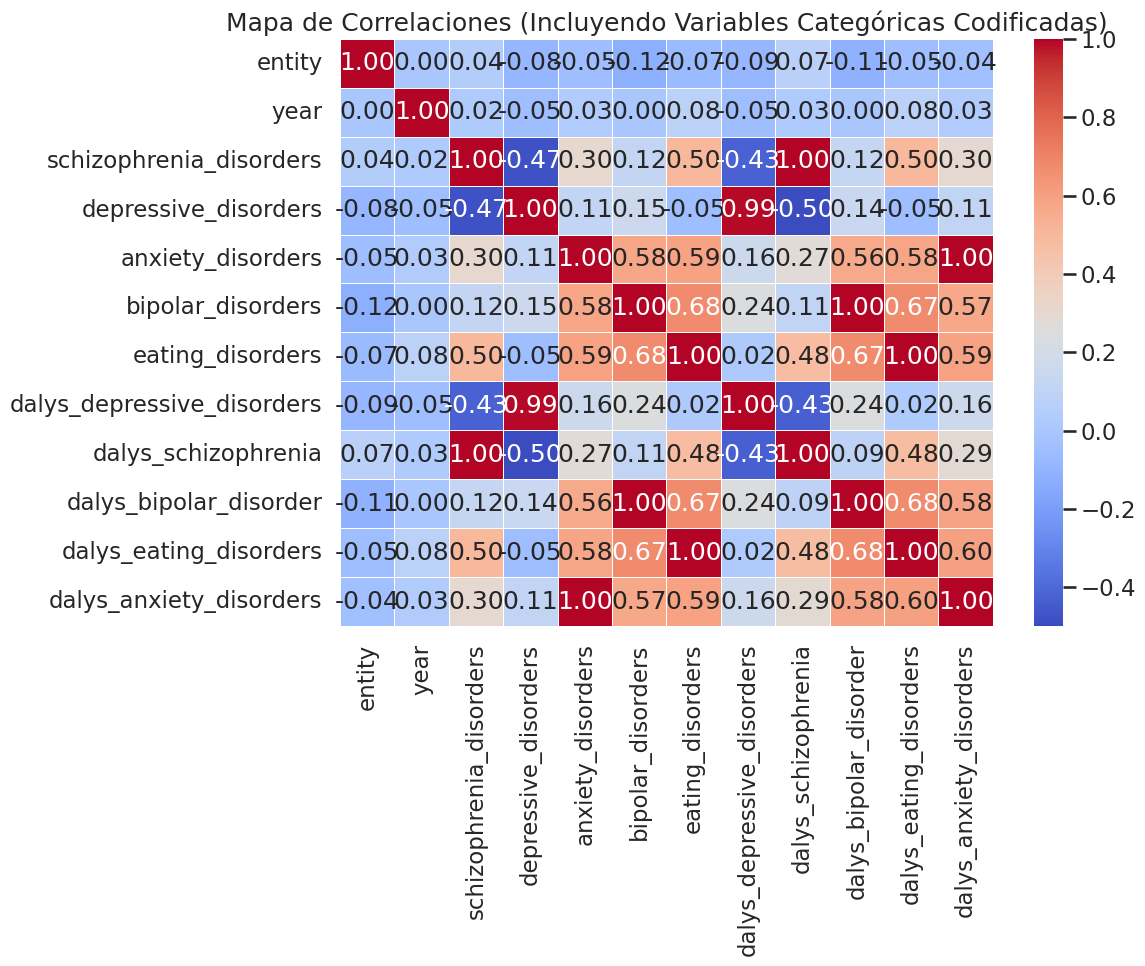

In [ ]:
# Copiar el DataFrame original para no modificarlo directamente
df_encoded = df_clean_data.copy()

# Codificar las columnas categóricas con LabelEncoder
label_encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlaciones (Incluyendo Variables Categóricas Codificadas)')
plt.tight_layout()
plt.show()

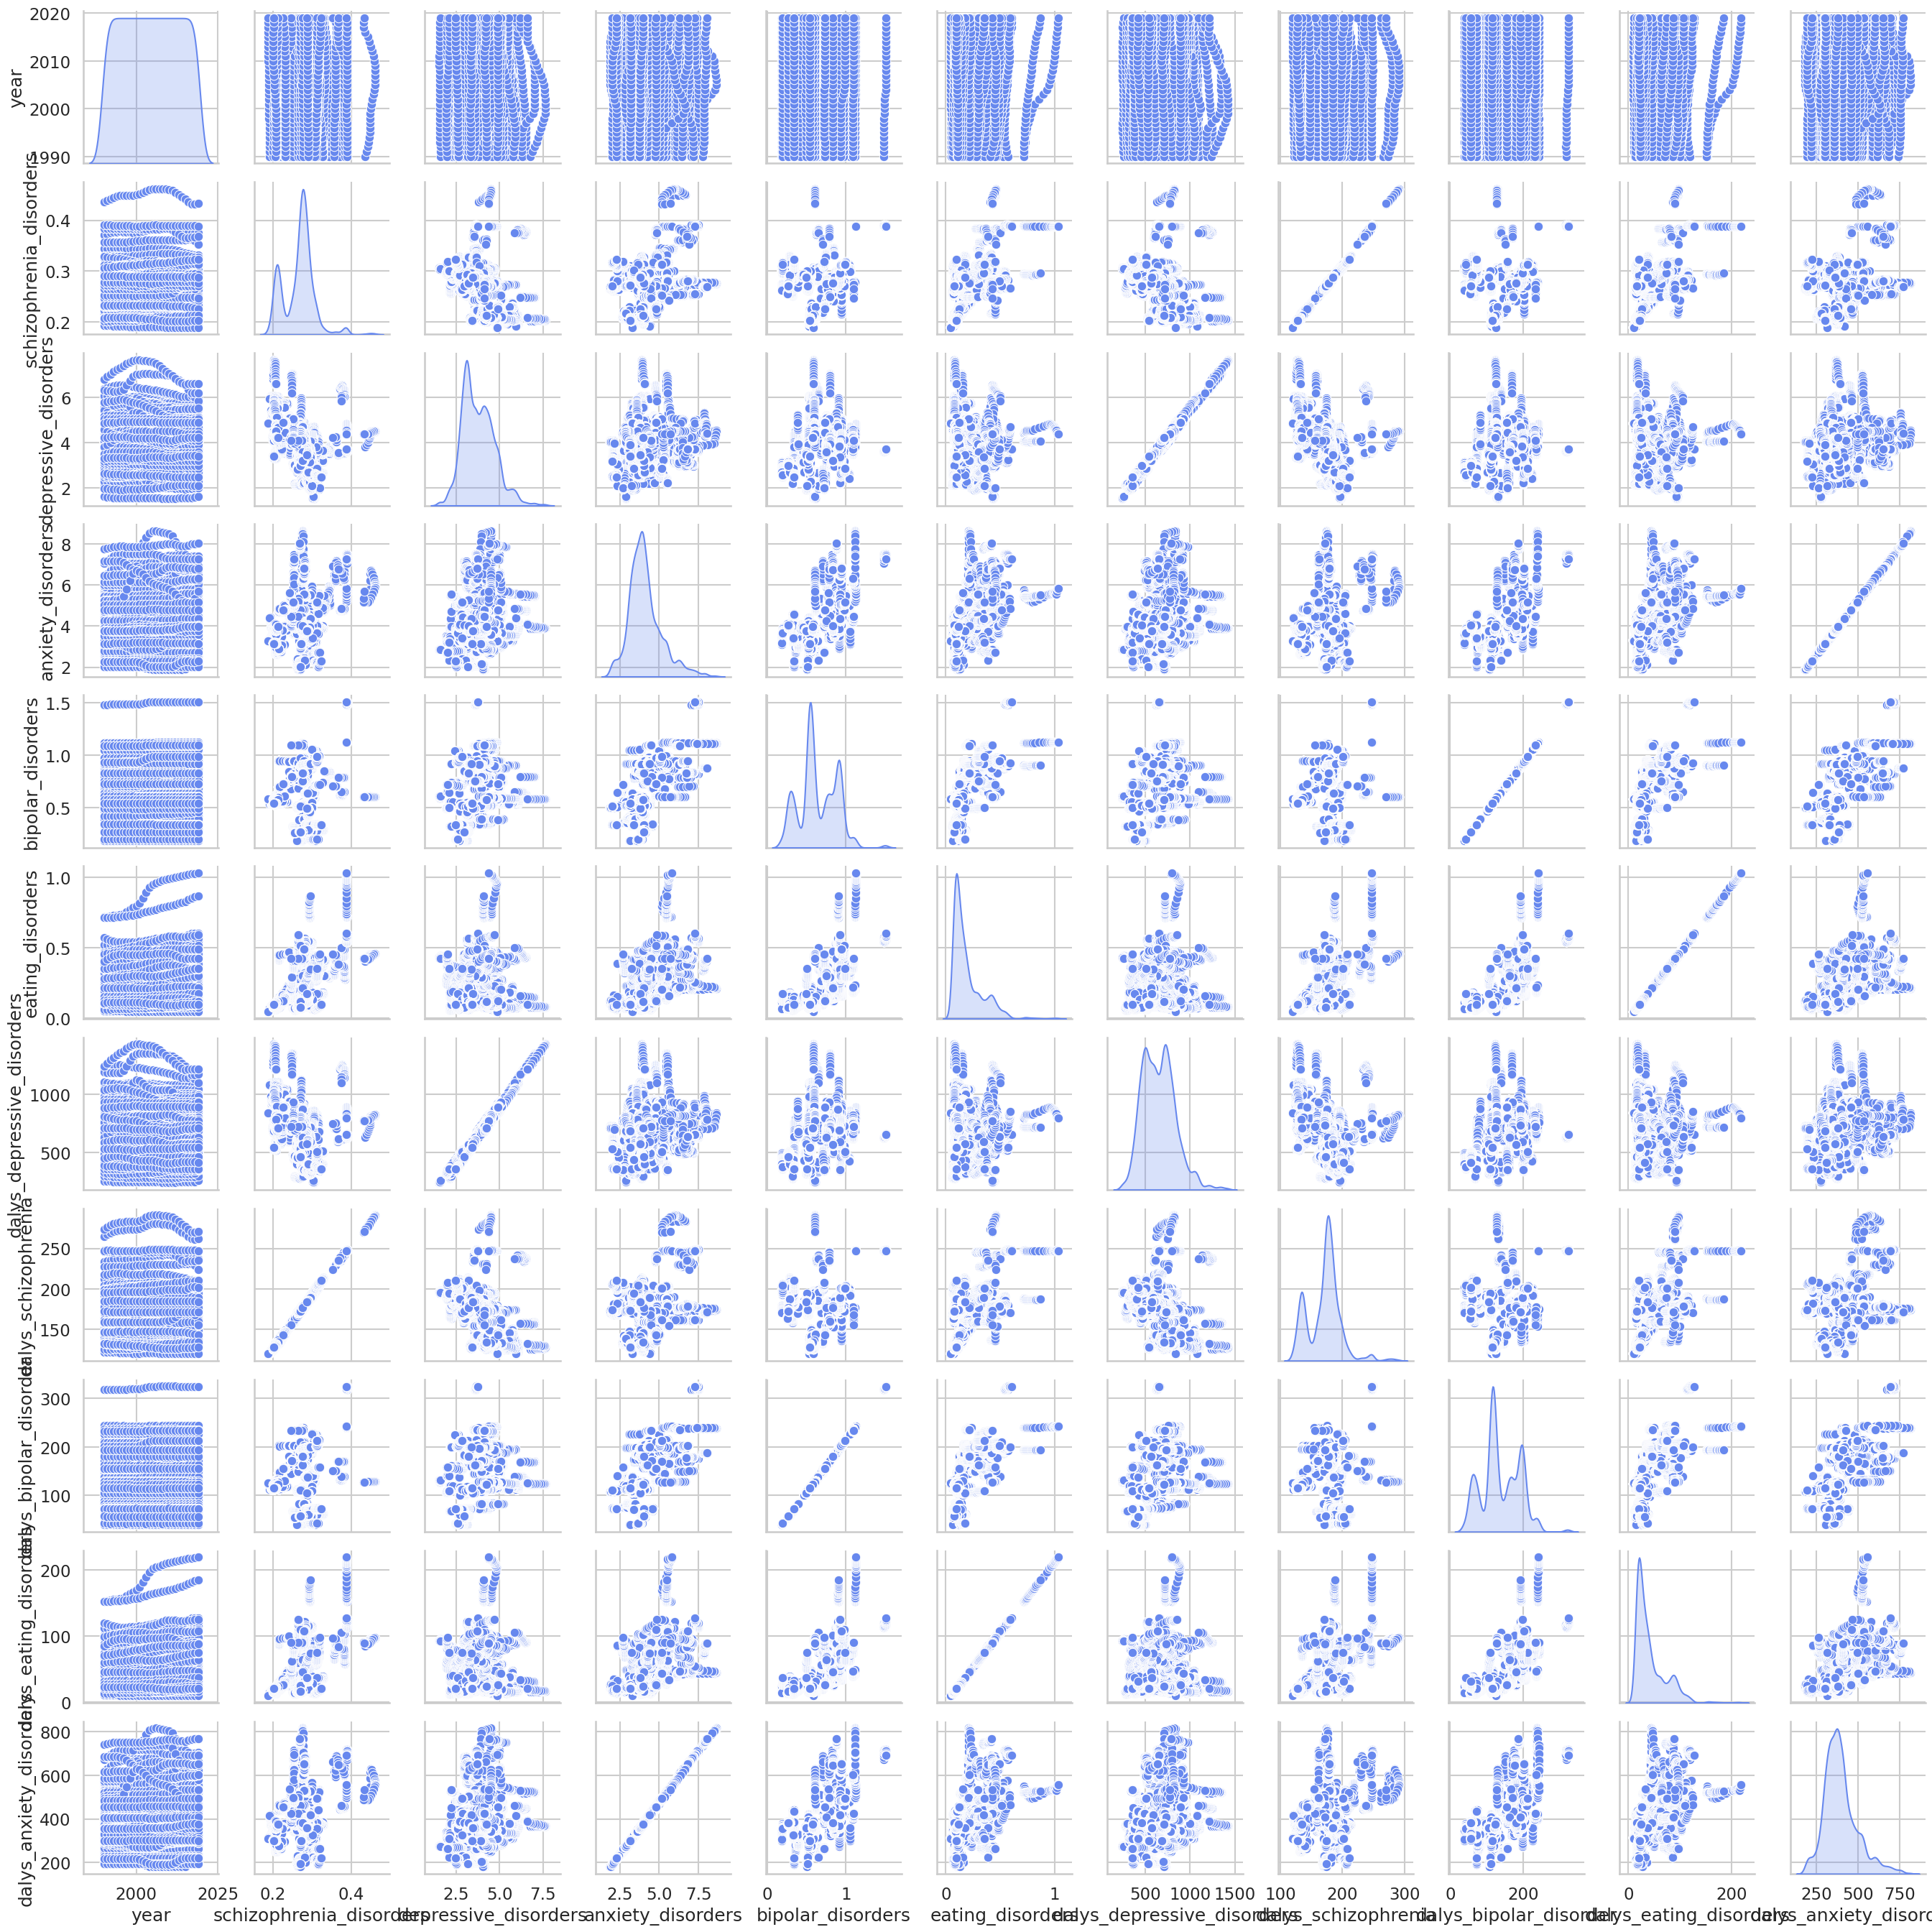

<Figure size 1000x800 with 0 Axes>

In [ ]:
sns.pairplot(df_clean_data, diag_kind='kde')
plt.figure(figsize=(10, 8))
plt.suptitle('Relación entre Variables Numéricas', y=1.02)
plt.show()

In [ ]:
df_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7110 entries, 0 to 7109
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   entity                      7110 non-null   object 
 1   year                        7110 non-null   int64  
 2   schizophrenia_disorders     6420 non-null   float64
 3   depressive_disorders        6420 non-null   float64
 4   anxiety_disorders           6420 non-null   float64
 5   bipolar_disorders           6420 non-null   float64
 6   eating_disorders            6420 non-null   float64
 7   dalys_depressive_disorders  6840 non-null   float64
 8   dalys_schizophrenia         6840 non-null   float64
 9   dalys_bipolar_disorder      6840 non-null   float64
 10  dalys_eating_disorders      6840 non-null   float64
 11  dalys_anxiety_disorders     6840 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 666.7+ KB


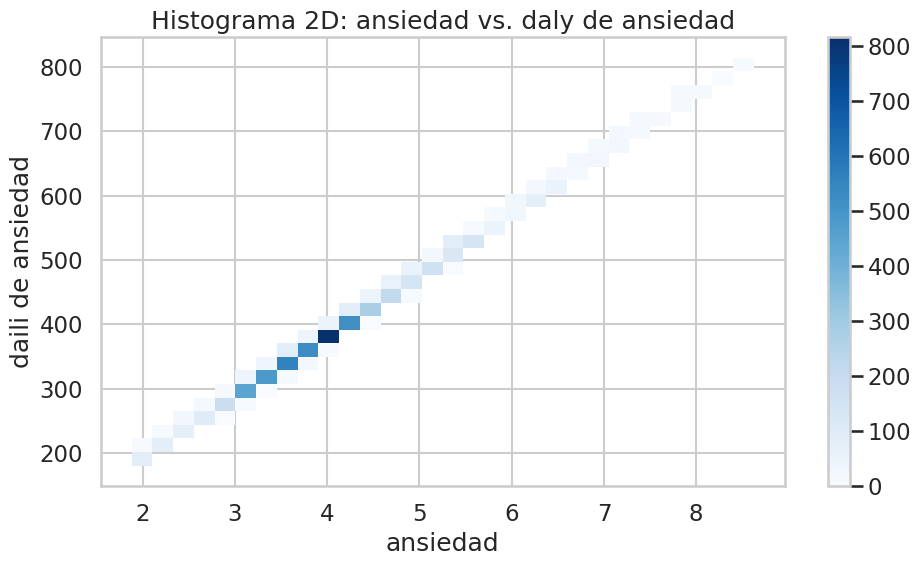

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data = df_clean_data,
    x='anxiety_disorders',
    y='dalys_anxiety_disorders',
    bins=30,
    cmap='Blues',
    cbar=True
)
plt.title('Histograma 2D: ansiedad vs. daly de ansiedad')
plt.xlabel('ansiedad')
plt.ylabel('daili de ansiedad')
plt.tight_layout()
plt.show()

<ipython-input-64-1f6697137f25>:40: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



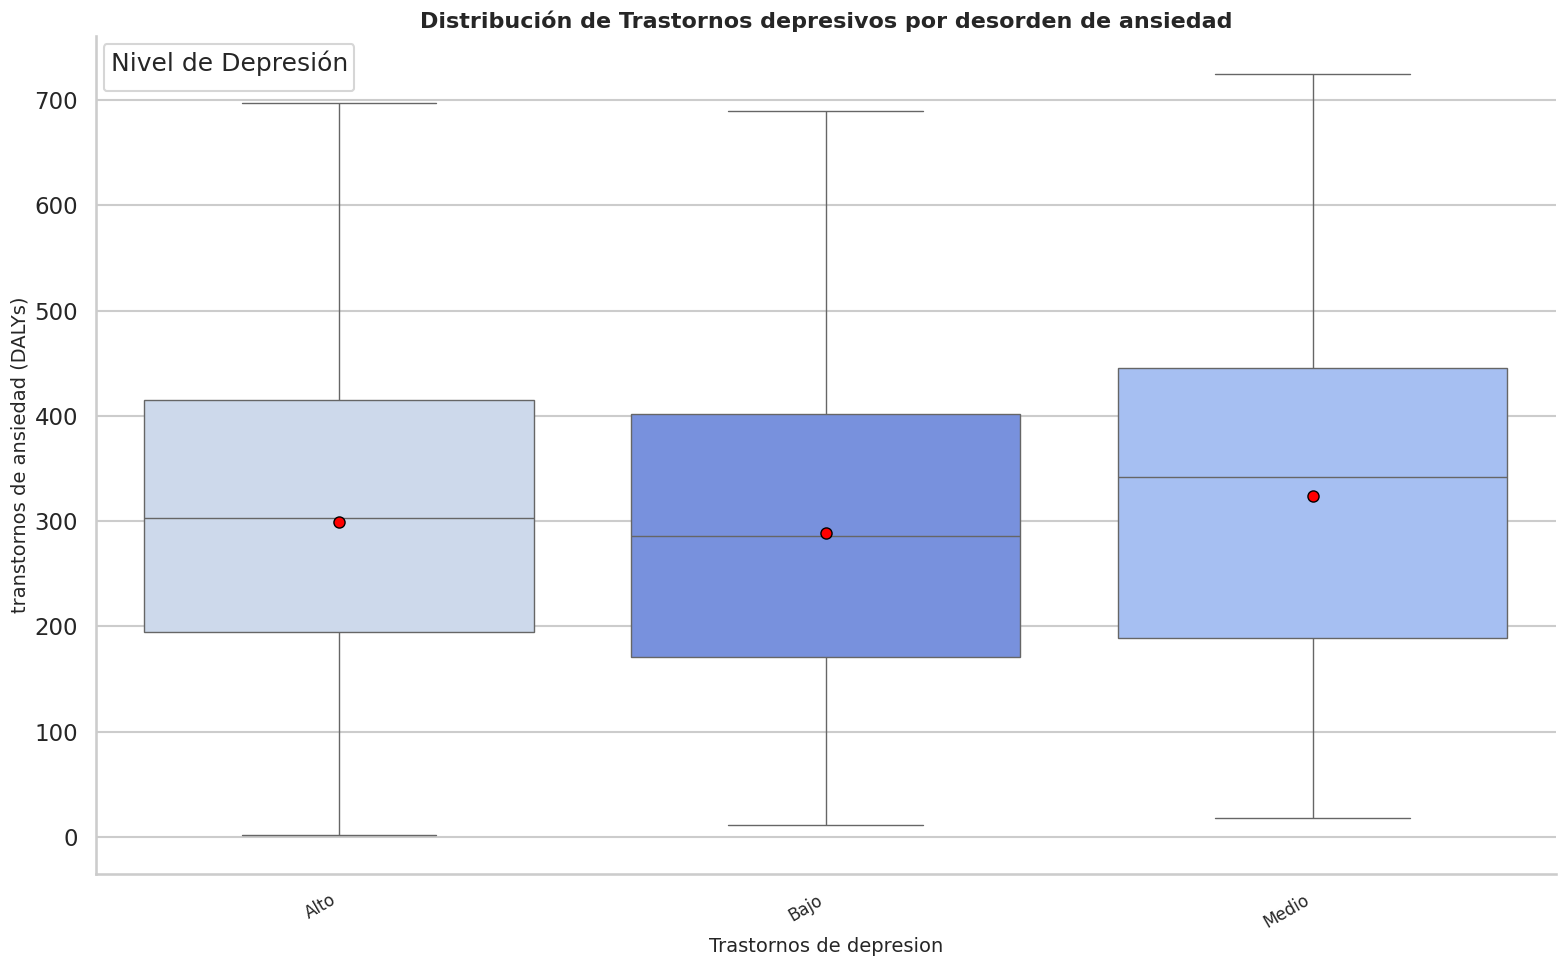

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Generar datos de ejemplo (reemplaza esto con tu df_clean_data)
np.random.seed(42)
num_samples = 500
df_clean_data = pd.DataFrame({
    'depressive_disorders': np.random.choice(['Bajo', 'Medio', 'Alto'], num_samples),
    'dalys_anxiety_disorders': np.random.rand(num_samples) * 500 + (np.random.randn(num_samples) * 100).clip(min=0)
})

# Ordenar las categorías para la visualización
order = ['Bajo', 'Medio', 'Alto']

# Configuración de estilo
sns.set(style="whitegrid", context="talk", palette="coolwarm")

plt.figure(figsize=(16, 10))
ax = sns.boxplot(
    data=df_clean_data,
    x='depressive_disorders',
    y='dalys_anxiety_disorders',
    hue='depressive_disorders',  # Añadimos 'hue' para diferenciar por color
    hue_order=order,             # Mantenemos el orden de las categorías en el hue
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black", "markersize": 8}
)

# Título y etiquetas
plt.title('Distribución de Trastornos depresivos por desorden de ansiedad', fontsize=16, fontweight='bold', loc='center')
plt.xlabel('Trastornos de depresion', fontsize=14)
plt.ylabel('transtornos de ansiedad (DALYs)', fontsize=14) # Aclaramos la unidad del eje y

# Rotación y ajuste de etiquetas
plt.xticks(rotation=30, ha='right', fontsize=12)

# Leyenda más clara
plt.legend(title='Nivel de Depresión', fontsize=12)

# Ajuste del layout
plt.tight_layout()

# Estilo despine para un look más limpio
sns.despine()

plt.show()


¡Claro! Aquí tienes la explicación de la gráfica de boxplots que has generado:

Título: "Distribución de Trastornos depresivos por desorden de ansiedad" - Indica que la gráfica muestra cómo se distribuyen los niveles de trastornos de ansiedad en diferentes grupos de niveles de trastornos depresivos.

Eje Horizontal (Trastornos de depresión): Este eje representa las categorías o niveles de trastornos depresivos. En este caso, tienes tres categorías: "Alto", "Bajo" y "Medio".

Eje Vertical (transtornos de ansiedad (DALYs)): Este eje representa la magnitud de los trastornos de ansiedad, medidos en DALYs (Disability-Adjusted Life Years). Los DALYs son una medida de la carga de enfermedad, combinando años de vida perdidos por muerte prematura y años vividos con discapacidad ajustada por su gravedad.

Cada Boxplot: Cada caja vertical (boxplot) representa la distribución de los niveles de trastornos de ansiedad para cada una de las categorías de trastornos depresivos. Vamos a desglosar qué representa cada parte de un boxplot:

La Caja (El rectángulo coloreado):

El borde inferior de la caja indica el percentil 25% de los datos. Esto significa que el 25% de los individuos en ese nivel de depresión tienen un nivel de ansiedad igual o inferior a este valor.
La línea horizontal dentro de la caja representa la mediana (percentil 50%) de los datos. Es el valor central de la distribución de ansiedad para ese grupo de depresión.
El borde superior de la caja indica el percentil 75% de los datos. Esto significa que el 75% de los individuos en ese nivel de depresión tienen un nivel de ansiedad igual o inferior a este valor.
La altura de la caja (rango intercuartílico - IQR) representa el 50% central de los datos. Es la diferencia entre el percentil 75% y el percentil 25%.
Los Bigotes (Las líneas que se extienden desde la caja): Los bigotes se extienden desde los bordes de la caja hasta los valores que aún se consideran dentro de un rango "típico" de la distribución. Generalmente, se extienden hasta 1.5 veces el IQR por encima del percentil 75% y 1.5 veces el IQR por debajo del percentil 25%.

Los Puntos Rojos con Borde Negro: Estos puntos representan la media (promedio) de los niveles de ansiedad para cada grupo de nivel de depresión.

Interpretación de la Gráfica:

Al observar los boxplots, puedes comparar la distribución de los trastornos de ansiedad entre los diferentes niveles de trastornos depresivos:

Nivel de Depresión "Alto": La caja para el nivel de depresión "Alto" parece estar ubicada ligeramente más abajo en el eje de ansiedad en comparación con los otros dos niveles. Su mediana (línea horizontal dentro de la caja) también parece ser un poco menor. Esto sugiere que, en este conjunto de datos, las personas con un nivel "Alto" de trastornos depresivos tienden a tener, en promedio, niveles de trastornos de ansiedad ligeramente más bajos que los otros grupos. Sin embargo, la dispersión de los datos (la altura de la caja y la longitud de los bigotes) indica la variabilidad dentro de este grupo.

Nivel de Depresión "Bajo": El boxplot para el nivel de depresión "Bajo" muestra una mediana de ansiedad que parece ser similar o ligeramente superior a la del grupo "Alto". La dispersión de los datos también es notable.

Nivel de Depresión "Medio": El boxplot para el nivel de depresión "Medio" muestra una mediana de ansiedad que parece ser comparable a la del grupo "Bajo". La dispersión de los datos también es significativa.

Comparación de Medias (Puntos Rojos): Los puntos rojos (las medias) te dan una comparación directa del promedio de los niveles de ansiedad para cada nivel de depresión. Observando sus posiciones verticales, puedes ver qué grupo tiene el promedio más alto o más bajo de trastornos de ansiedad. En esta gráfica, las medias parecen estar relativamente cercanas entre los tres grupos.

En resumen, esta gráfica de boxplots te permite visualizar y comparar la distribución de los trastornos de ansiedad en diferentes niveles de trastornos depresivos. Puedes observar las medianas, la dispersión (variabilidad) y la presencia de posibles valores atípicos (aunque no se muestran explícitamente aquí) para cada grupo.

In [ ]:
import pandas as pd
import plotly.express as px

# Suponiendo que ya tienes tu DataFrame llamado df_clean_data cargado
# Si no lo tienes cargado, necesitarás la siguiente línea (ajustando la ruta del archivo):
# df_clean_data = pd.read_csv("tu_archivo_de_datos.csv")

# Crear el diagrama de dispersión con plotly.express
fig = px.scatter(
    df_clean_data,
    x="depressive_disorders",
    y="dalys_depressive_disorders",
    title="Relación entre Trastornos Depresivos y DALYs por Trastornos de depresion",
    labels={"depressive_disorders": "Nivel de Trastornos Depresivos",
            "dalys_depressive_disorders": "DALYs por Trastornos de depresion"}
)

# Mostrar la gráfica
fig.show()

In [ ]:
df_clean_data.sort_values(by="depressive_disorders" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df_clean_data, x="depressive_disorders", y="entity", orientation='h',color='depressive_disorders')
fig.show()

<Figure size 1280x960 with 0 Axes>

In [ ]:
df_clean_data.sort_values(by= "anxiety_disorders" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df_clean_data, x="anxiety_disorders", y="entity", orientation='h',color='anxiety_disorders')
fig.show()

<Figure size 1280x960 with 0 Axes>

----
----

## Elección de variable objetivo:
Después del análisis de los datos sacamos la conclusión de usar `dalys_depressive_disorders`
Así que acontinuación se llevará a cabo una evaluación de esta variable para obtener información relevante.

## Análisis de valores faltantes

La tabla de porcentajes nos dice de un vistazo en qué columnas tenemos datos ausentes y en qué magnitud.

El heatmap de nulos es una visualización que resalta patrones de ausencia: por ejemplo, si varias columnas comparten las mismas filas faltantes, o si los nulos están concentrados en un bloque de filas.

Con esta información decidimos:

Si imputar (media, mediana, moda…)

Si eliminar columnas/filas con muchos nulos

Si hay un patrón (por ejemplo, faltan datos solo en ciertos grupos)





n_miss  pct_miss
depressive_disorders           690  9.704641
schizophrenia_disorders        690  9.704641
bipolar_disorders              690  9.704641
anxiety_disorders              690  9.704641
eating_disorders               690  9.704641
dalys_bipolar_disorder         270  3.797468
dalys_schizophrenia            270  3.797468
dalys_depressive_disorders     270  3.797468
dalys_eating_disorders         270  3.797468
dalys_anxiety_disorders        270  3.797468
entity                           0  0.000000
year                             0  0.000000

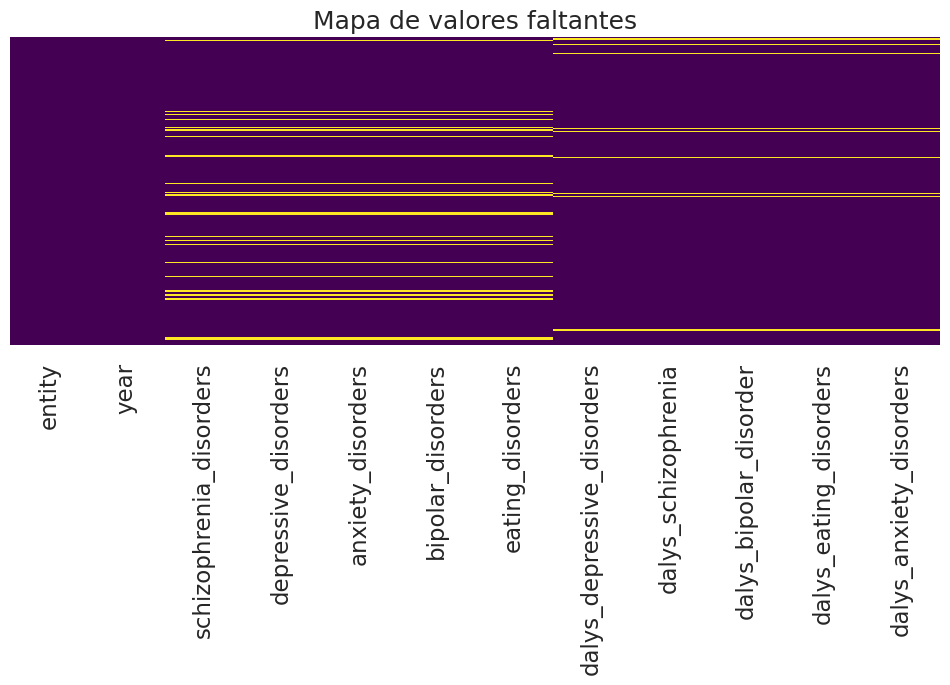

In [ ]:
# 1.1 Tabla de porcentaje de nulos por columna
missing = df_clean_data.isna().sum().to_frame('n_miss')
missing['pct_miss'] = 100 * missing['n_miss'] / len(df_clean_data)
display(missing.sort_values('pct_miss', ascending=False))

# 1.2 Heatmap de ausencia
plt.figure(figsize=(12,4))
sns.heatmap(df_clean_data.isna(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mapa de valores faltantes')
plt.show()


### Hemos revisado los datos:

Patrón de nulos por bloque

Las primeras cinco columnas (los “_disorders” de prevalencia) tienen un ~9.7 % de valores faltantes (690 filas).

Las cinco columnas de DALYs (incluyendo tu target dalys_depressive_disorders) tienen un ~3.8 % de nulos (270 filas).

entity y year están completas.

----
**Comó proceder con cada grupo**

Target (dalys_depressive_disorders): es complicado entrenar con filas donde falta el target, así que lo razonable es eliminar esas 270 filas.

Predictores numéricos (~9.7 % nulos): como el porcentaje no es muy alto, podemos imputar (media/mediana) o usar un método más sofisticado (KNN, interpolación temporal si es serie de tiempo, etc.).

Por lo cual vamos a realizar una limpieza:

`dropna(subset=[…])` elimina únicamente las filas que no tienen tu variable objetivo.

`SimpleImputer(strategy='median')` sustituye cada nulo por la mediana de esa columna.

`Reinicias el índice (reset_index)` para que nuestros datos queden ordenados tras la eliminación.


In [ ]:
# --- 1) Eliminar filas sin target ---
df = df_clean_data.dropna(subset=['dalys_depressive_disorders']).reset_index(drop=True)

# --- 2) Imputar el resto de predictores numéricos ---
from sklearn.impute import SimpleImputer

# Definimos qué columnas vamos a imputar
feat_cols = ['schizophrenia_disorders',
             'depressive_disorders',
             'bipolar_disorders',
             'anxiety_disorders',
             'eating_disorders',
             'dalys_schizophrenia',
             'dalys_bipolar_disorder',
             'dalys_eating_disorders',
             'dalys_anxiety_disorders']

imputer = SimpleImputer(strategy='median')
df[feat_cols] = imputer.fit_transform(df[feat_cols])

# Verificamos que ya no queden nulos
print("Nulos tras imputación:\n", df[feat_cols].isna().sum())


Nulos tras imputación:
 schizophrenia_disorders    0
depressive_disorders       0
bipolar_disorders          0
anxiety_disorders          0
eating_disorders           0
dalys_schizophrenia        0
dalys_bipolar_disorder     0
dalys_eating_disorders     0
dalys_anxiety_disorders    0
dtype: int64


## Detección de outliers con boxplots
Un boxplot muestra mediana, cuartiles y “bigotes” (1,5×IQR), y marca puntos que quedan fuera de esos bigotes (posibles outliers).

Detectar outliers es clave para decidir si:

Los recortamos (winsorizing)

Los imputamos

O los mantenemos (si son valores reales que tienen sentido)





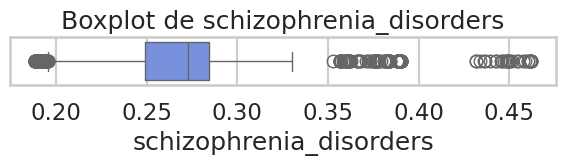

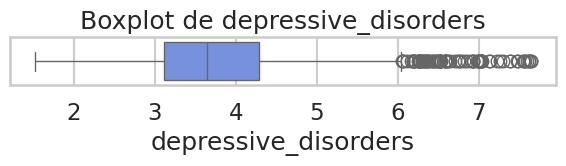

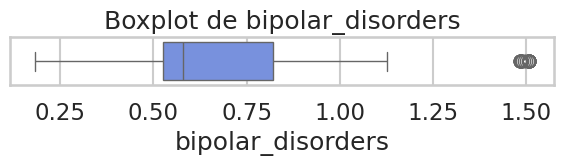

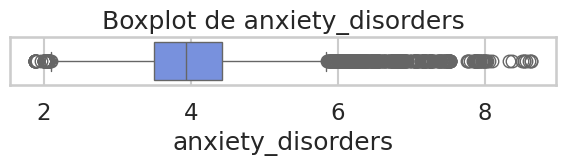

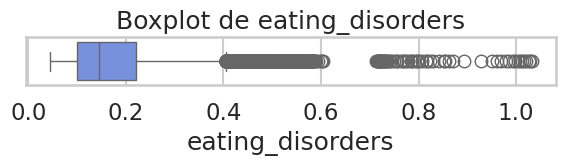

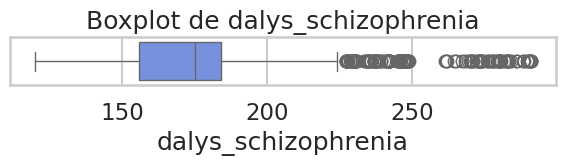

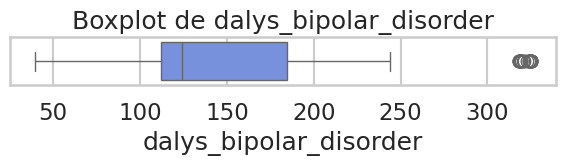

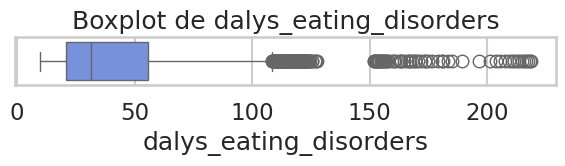

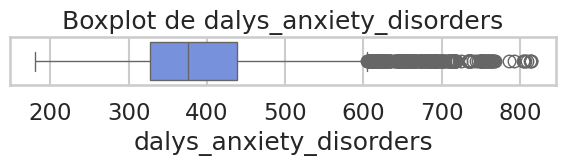

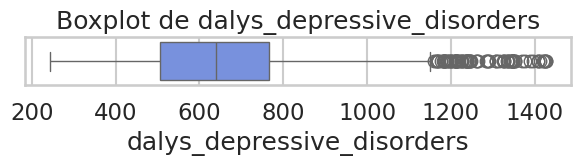

In [ ]:
# Boxplots para detectar outliers en todas las numéricas
num_cols = [
    'schizophrenia_disorders',
    'depressive_disorders',
    'bipolar_disorders',
    'anxiety_disorders',
    'eating_disorders',
    'dalys_schizophrenia',
    'dalys_bipolar_disorder',
    'dalys_eating_disorders',
    'dalys_anxiety_disorders',
    'dalys_depressive_disorders'  # incluye el target también
]

for c in num_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[c])
    plt.title(f'Boxplot de {c}')
    plt.tight_layout()
    plt.show()


### ¿Qué nos dicen estas gráficas?

1. `schizophrenia_disorders`

  Mediana ~0.27, IQR ~[0.25–0.30].

  Bigotes van de ~0.20 a ~0.33.

  Outliers empiezan alrededor de 0.34 y llegan hasta ~0.46 (varias regiones con prevalencia inusualmente alta).

Estrategia: winsorizar al 5–95 % (o clippear al percentil 95) para recortar esos valores extremos sin perder la escala original.

2. `depressive_disorders`

  Mediana ~3.7, IQR ~[3.2–4.3].

  Bigotes ~[1.7–6.0].

  Outliers desde 6 hasta ~7.5.

Estrategia: prevalencias altas son reales pero muy dispersas; de nuevo, winsorizing al [5 %,95 %] deja intactos los valores centrales y evitar que estos outliers desbalanceen el RF.

3. `bipolar_disorders`

  Mediana ~0.68, IQR ~[0.55–0.82].

  Bigotes ~[0.20–1.10].

  Outliers escasos por encima de 1.3–1.5.

Estrategia: aquí podría bastar dejarlos (el RF los tolera) o bien winsorizar muy suavemente (p. ej. límite superior al percentil 97).

4. `anxiety_disorders`

  Mediana ~3.9, IQR ~[3.5–5.8].

  Bigotes ~[2.1–5.8].

  Outliers extensos entre 6 y 8.5.

Estrategia: winsorizing al [5,95] % o incluso transformar con log1p para “aplanar” la cola derecha antes de meterla al modelo.

5. `eating_disorders`

  Mediana ~0.18, IQR ~[0.12–0.24].

  Bigotes ~[0.04–0.40].

  Outliers muy dispersos hasta ~1.0.

Estrategia: winsorizar al [5,95] % o, dado que la cola es muy alargada, log1p deja la variable más simétrica.

6. `dalys_schizophrenia`

  Mediana ~175, IQR ~[150–225].

  Bigotes ~[120–225].

  Outliers continuos desde ~230 hasta 295.

Estrategia: winsorizar al percentil 95 para no dejar outliers muy altos; una transformación log también es válida si quieres reducir el rango numérico.

7. `dalys_bipolar_disorder`

  Mediana ~140, IQR ~[110–180].

  Bigotes ~[45–245].

  Outliers hasta ~325.

Estrategia: winsorizing al 95 % (o log1p, especialmente útil ya que vamos a comparar importancias absolutas).

8. `dalys_eating_disorders`

  Mediana ~40, IQR ~[20–100].

  Bigotes ~[10–100].

  Outliers muy frecuentes entre 110 y 220.

Estrategia: dada la cola pesada, transformos log1p para aplanar y luego, si aún hay outliers, winsorizar.

9. `dalys_anxiety_disorders`

  Mediana ~380, IQR ~[240–600].

  Bigotes ~[160–600].

  Outliers hasta ~800.

Estrategia: log1p prácticamente obligatoria para controlar la escala; si tras eso siguen outliers extremos, winsorizar.

10. `dalys_depressive_disorders (target)`

  Mediana ~650, IQR ~[500–1150].

  Bigotes ~[230–1150].

  Outliers hasta ~1400.

Estrategia: igual que el anterior, log1p para el target mejora la estabilidad y reduce la influencia de regiones con DALYs atípicamente altos.



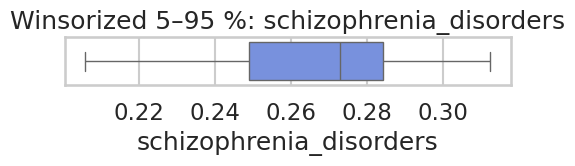

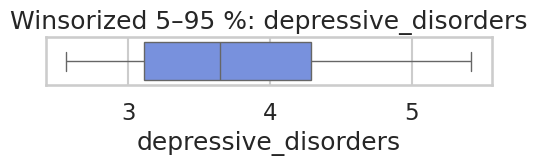

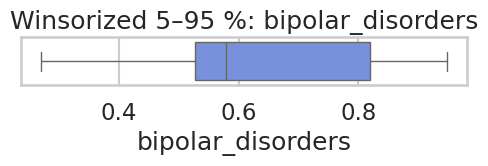

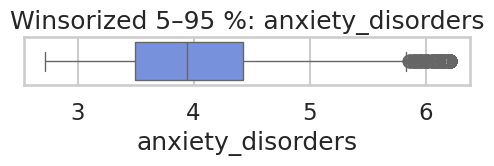

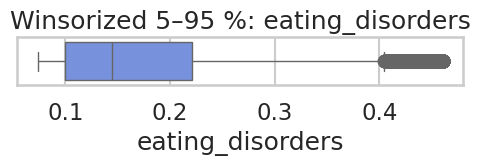

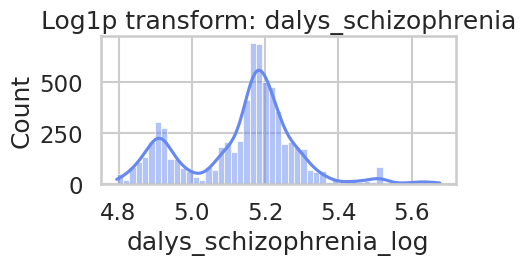

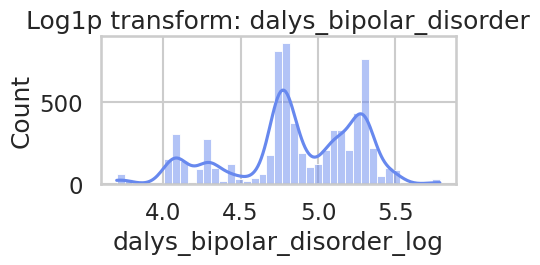

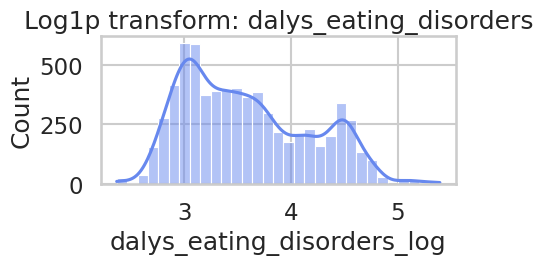

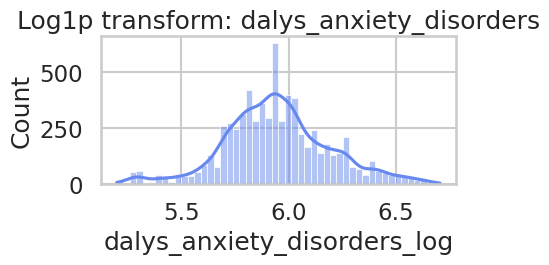

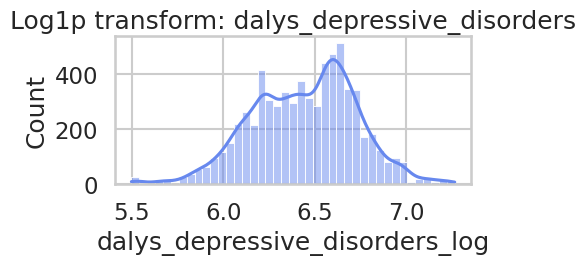

In [ ]:
# --- 1) Winsorizing de prevalencias al [5 %, 95 %] ---
from scipy.stats.mstats import winsorize

to_winsor = [
    'schizophrenia_disorders',
    'depressive_disorders',
    'bipolar_disorders',
    'anxiety_disorders',
    'eating_disorders'
]

for col in to_winsor:
    # limits=(lower_pct, upper_pct)
    df[col] = winsorize(df[col], limits=(0.05, 0.05))

# Verificamos boxplots tras winsorizing
for col in to_winsor:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=df[col])
    plt.title(f'Winsorized 5–95 %: {col}')
    plt.tight_layout()
    plt.show()

# --- 2) Log-transformación de DALYs y del target ---
import numpy as np

to_log = [
    'dalys_schizophrenia',
    'dalys_bipolar_disorder',
    'dalys_eating_disorders',
    'dalys_anxiety_disorders',
    'dalys_depressive_disorders',
]

for col in to_log:
    df[col + '_log'] = np.log1p(df[col])

# Vemos histogramas de los log-transformados
for col in to_log:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col + '_log'], kde=True)
    plt.title(f'Log1p transform: {col}')
    plt.tight_layout()
    plt.show()


### Conclusiones:

1. Prevalencias winsorizadas (5–95 %)

Ahora los boxplots de `schizophrenia_disorders`, `depressive_disorders`, `bipolar_disorders`, `anxiety_disorders` y `eating_disorders` muestran bigotes limpios hasta los nuevos percentiles 5 y 95, y prácticamente ningún outlier más allá.

La dispersión central (IQR) se mantiene, pero hemos eliminado la influencia de valores extremos que podían desviar el modelo.

2. Log-transformación de los DALYs y el target

Los histogramas de `dalys_*_log` y `dalys_depressive_disorders_log` son mucho más simétricos y sin colas tan pesadas.

Estas distribuciones son ahora más cercanas a “gausianas”, lo que ayuda a que nuestro modelo no se vea dominado por rangos muy amplios.



## Correlación univariante con el target

La serie `corr_target` nos ordena las variables numéricas según su correlación (positiva o negativa) con nuestra variable objetivo. Así identificamos rápidamente las que más “se mueven” junto a `dalys_depressive_disorders`.

El heatmap de correlaciones entre todas las numéricas nos ayudan a ver multicolinealidad: si dos predictores están muy correlacionados entre sí, quizá convenga quedarse con uno para no introducir ruido en el modelo.

abs_corr
depressive_disorders         0.940140
schizophrenia_disorders      0.536987
dalys_schizophrenia_log      0.475411
dalys_bipolar_disorder_log   0.364021
bipolar_disorders            0.278438
dalys_anxiety_disorders_log  0.180401
anxiety_disorders            0.166678
dalys_eating_disorders_log   0.020099
eating_disorders             0.007570

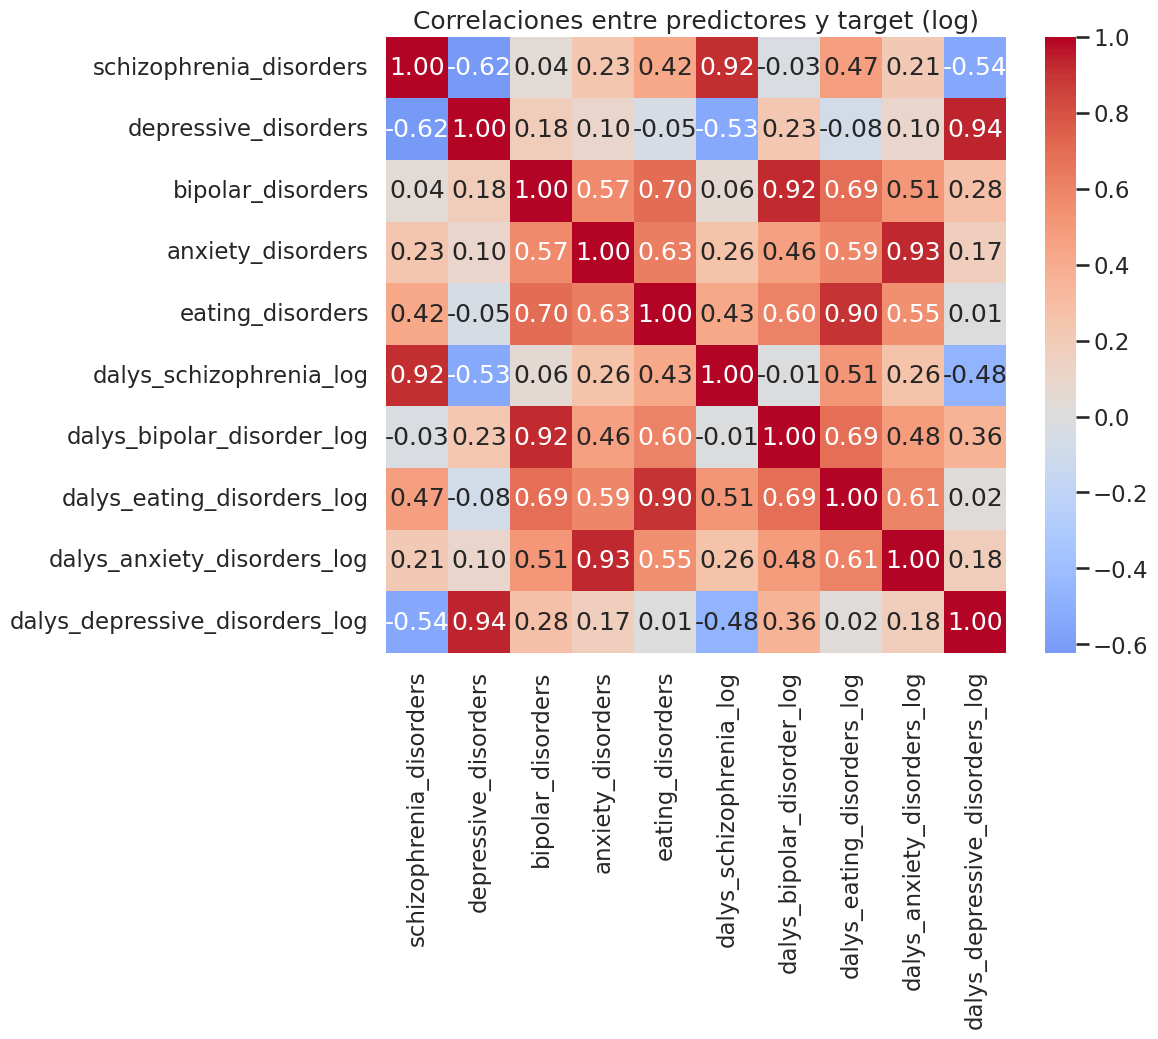

In [ ]:
# 1) Correlación univariante con el target log-transformado
predictors = [
    'schizophrenia_disorders',
    'depressive_disorders',
    'bipolar_disorders',
    'anxiety_disorders',
    'eating_disorders',
    'dalys_schizophrenia_log',
    'dalys_bipolar_disorder_log',
    'dalys_eating_disorders_log',
    'dalys_anxiety_disorders_log'
]

corrs = df[predictors + ['dalys_depressive_disorders_log']].corr()
target_corr = corrs['dalys_depressive_disorders_log'].drop('dalys_depressive_disorders_log')
display(target_corr.abs().sort_values(ascending=False).to_frame('abs_corr'))

# 2) Heatmap de todas las correlaciones
plt.figure(figsize=(10,8))
sns.heatmap(corrs, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlaciones entre predictores y target (log)')
plt.show()


### Correlación con el target:

Mira la columna `abs_corr` ordenada de mayor a menor:

| Variable                        | \|r\| con `dalys_depressive_disorders_log` | Interpretación                                                                                                     |
|---------------------------------|--------------------------------------------|---------------------------------------------------------------------------------------------------------------------|
| `depressive_disorders`          | 0.94                                       | Muy fuerte: el aumento en prevalencia de depresión se traduce casi linealmente en más DALYs de depresión.          |
| `schizophrenia_disorders`       | 0.54                                       | Moderada–fuerte (correlación negativa, r≈–0.54): donde hay más esquizofrenia tienden a bajar los DALYs de depresión. |
| `dalys_schizophrenia_log`       | 0.48                                       | Moderada: las regiones con alto DALYs de esquizofrenia también tienden a tener más DALYs de depresión.             |
| `dalys_bipolar_disorder_log`    | 0.36                                       | Moderada–débil: relación positiva, pero ya mucho menos pronunciada.                                                 |
| `bipolar_disorders`             | 0.28                                       | Débil–moderada: prevalencia de bipolaridad explica algo de la varianza.                                              |
| `dalys_anxiety_disorders_log`   | 0.18                                       | Baja: poca relación con DALYs de depresión.                                                                          |
| `anxiety_disorders`             | 0.17                                       | Muy débil.                                                                                                           |
| `dalys_eating_disorders_log`    | 0.02                                       | Prácticamente nula.                                                                                                  |
| `eating_disorders`              | 0.01                                       | Nula.                                                                                                                |

**Magnitud de correlaciones**  
- > 0.8 → muy fuerte  
- 0.5–0.8 → fuerte–moderada  
- 0.3–0.5 → moderada  
- 0.1–0.3 → débil  
- < 0.1 → insignificante  


Signo (no aparece en `abs_corr`, pero en la matriz ves colores azules/rojos). Por ejemplo, `schizophrenia_disorders` tiene r≈–0.54, lo cual es interesante porque indica que, a igualdad de otras cosas, zonas con más esquizofrenia presentan menores DALYs de depresión (quizá por diferencias demográficas o de diagnóstico).

-----

### Multicolinealidad entre predictores

Fíjate en la diagonal de la matriz:

`schizophrenia_disorders` vs `dalys_schizophrenia_log` → r≈0.92

`bipolar_disorders` vs `dalys_bipolar_disorder_log` → r≈0.92

(y también `eating_disorders` con su log, etc.)

Eso significa que estás capturando básicamente la misma información dos veces (prevalencia y DALYs de la misma condición). Con Random Forest no es un gran problema, pero para otro modelo mejor dejar solo uno de cada par:

O prevalencia

O log-DALYs

### ¿Qué variables usar para entrenar nuestro modelo?

Con base en la correlación y reduciendo redundancias:

`depressive_disorders` — el más predictivo (r=+0.94).

`schizophrenia_disorders` — moderado, signo negativo (r=–0.54).

`dalys_bipolar_disorder_log` — moderada (r=+0.36).

`bipolar_disorders` — moderada–débil (r=+0.28).

`dalys_schizophrenia_log` — moderada (r=+0.48) opcional en vez de la prevalencia de esquizofrenia si prefieres el log-DALYs.

Podemos empezar sólo con las top 5 y luego añadir más hay tiempo para mejorar ligeramente el R².

-----
### Resumen rápido

**Muy relevantes:**

`depressive_disorders` (r=0.94)

**Moderadas:**

`schizophrenia_disorders` (–0.54)

`dalys_schizophrenia_log` (+0.48)

**Menos aportan:**

`bipolar_disorders` (0.28)

`dalys_bipolar_disorder_log` (0.36)

**Poca señal:**

`anxiety_*` / `eating_*`


## Distribución del target por categorías

<ipython-input-92-71895903fde7>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




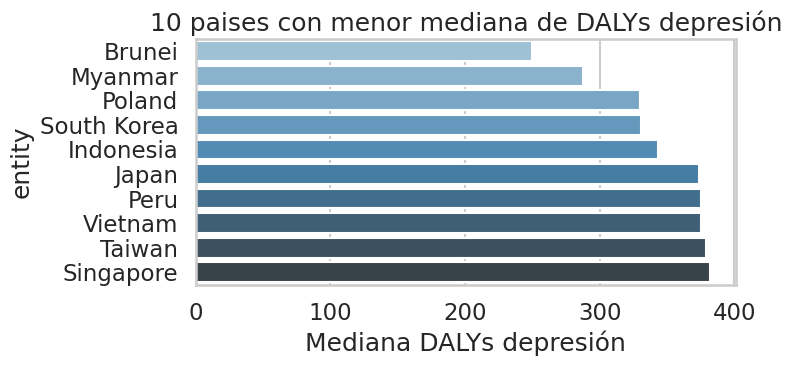

<ipython-input-92-71895903fde7>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




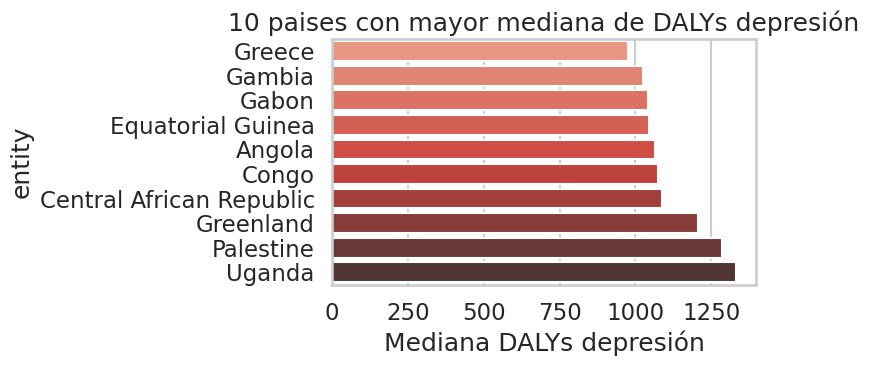

In [ ]:
# 1. Agrupamos y calculamos mediana
medianas = df.groupby('entity')['dalys_depressive_disorders'].median().sort_values()

# 2. Top 10 más bajos y 10 más altos
bajos = medianas.head(10)
altos = medianas.tail(10)

# 3. Barplots
plt.figure(figsize=(8,4))
sns.barplot(x=bajos.values, y=bajos.index, palette='Blues_d')
plt.title('10 paises con menor mediana de DALYs depresión')
plt.xlabel('Mediana DALYs depresión')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x=altos.values, y=altos.index, palette='Reds_d')
plt.title('10 paises con mayor mediana de DALYs depresión')
plt.xlabel('Mediana DALYs depresión')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px


# Agrupamos por país y calculamos la mediana de DALYs depresión
medianas = df.groupby('entity', as_index=False)['dalys_depressive_disorders'].median()

#  Creamos el choropleth
fig = px.choropleth(
    medianas,
    locations='entity',            # nombre de la columna con los países
    locationmode='country names',  # interpretamos 'entity' como nombre de país
    color='dalys_depressive_disorders',
    color_continuous_scale='Viridis',
    title='Mediana de DALYs por depresión (por país)',
    labels={'dalys_depressive_disorders':'Mediana DALYs depresión'}
)

# 5) Ajustes de diseño
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    margin=dict(l=0, r=0, t=50, b=0)
)

# 6) Mostrar
fig.show()


### Escala de colores

Morado oscuro (~250–350) → países con cargas de depresión relativamente bajas.

Verde intermedio (~600–800) → carga media.

Amarillo (~1 000–1 300+) → carga muy alta de DALYs por depresión.

Patrones geográficos

África central (p. ej. República Democrática del Congo, Chad) muestra los valores más altos (amarillo), indicando que en esas regiones el impacto de la depresión (DALYs) es especialmente elevado.

Europa occidental y Norteamérica tienden al morado o azul oscuro, con medianas más bajas (≈300–500).

Sudamérica e India/Asia aparecen en verde-azulado, con valores intermedios (≈500–800).

Países insulares (Australia, Japón) también rondan valores medios.

----
### Interpretación:

Un valor alto (amarillo) puede indicar tanto una prevalencia importante de depresión como falta de recursos sanitarios para mitigarlos, políticas de salud mental menos desarrolladas, o factores sociodemográficos.

Un valor bajo (morado) podría reflejar menores tasas de diagnóstico, mejores programas de atención o diferencias culturales en la notificación.

## Scatter / Pairplot de las top-5 numéricas

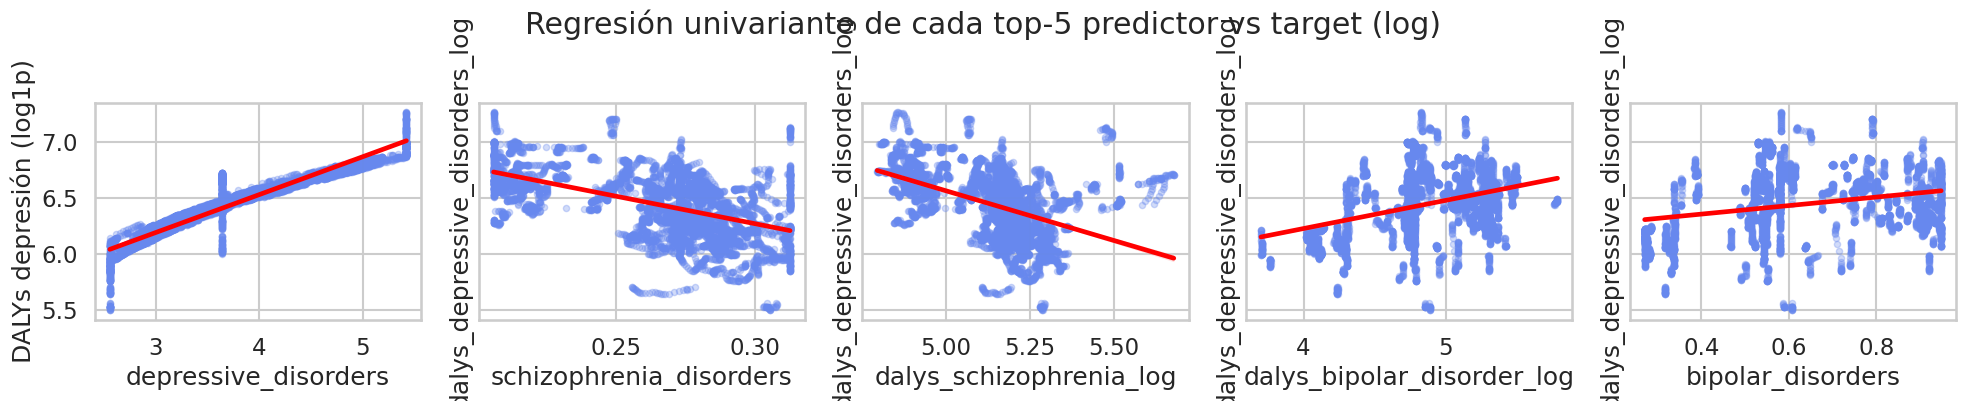

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top5 = [
    'depressive_disorders',
    'schizophrenia_disorders',
    'dalys_schizophrenia_log',
    'dalys_bipolar_disorder_log',
    'bipolar_disorders'
]

fig, axes = plt.subplots(1, 5, figsize=(20,4), sharey=True)
for ax, col in zip(axes, top5):
    sns.regplot(
        x=df[col],
        y=df['dalys_depressive_disorders_log'],
        scatter_kws={'alpha':0.3, 's':20},
        line_kws={'color':'red'},
        ax=ax
    )
    ax.set_xlabel(col)
axes[0].set_ylabel('DALYs depresión (log1p)')
fig.suptitle('Regresión univariante de cada top-5 predictor vs target (log)', y=1.02)
plt.tight_layout()
plt.show()


| Predictor                        | Pendiente de la línea        | Interpretación                                                                                                 |
| -------------------------------- | :--------------------------: | -------------------------------------------------------------------------------------------------------------- |
| **`depressive_disorders`**       | Positiva muy pronunciada     | Fuerte relación lineal: a más prevalencia de depresión, más DALYs de depresión (r≈0.94).                       |
| **`schizophrenia_disorders`**    | Ligera pendiente negativa    | Correlación inversa moderada: países con más esquizofrenia tienden a tener menos DALYs de depresión (r≈–0.54). |
| **`dalys_schizophrenia_log`**    | Negativa moderada            | Relación negativa: los DALYs de esquizofrenia “compiten” con los de depresión (r≈–0.48).                       |
| **`dalys_bipolar_disorder_log`** | Positiva suave               | Ligera tendencia ascendente; aporta señal pero con mucha dispersión (r≈0.36).                                  |
| **`bipolar_disorders`**          | Muy suave positiva           | Señal débil: la prevalencia de bipolaridad explica muy poca varianza en DALYs de depresión (r≈0.28).           |


In [ ]:
# Exportar el DataFrame a un archivo CSV en el directorio actual
df_clean_data.to_csv('df_final1.csv', index=False)